In [46]:
import qe_suite.format as f
import numpy as np
import xml.etree.ElementTree as ET

tree = ET.parse('../qesuite_out/pwscf.xml')
root = tree.getroot()

In [4]:
for child in root:
    print(child.tag, child.attrib)

general_info {}
parallel_info {}
input {}
output {}
exit_status {}
timing_info {}
closed {'DATE': '19 Feb 2022', 'TIME': '16:16:59'}


In [133]:
bs= root.find("output/band_structure");
EF= float( root.find("output/band_structure/fermi_energy").text );
#kpts= np.array([ np.array( kp.text.split(" "), dtype=float ) for kp in bs.iter("k_point") ])


In [136]:
kpts = np.array([kp.text.split(" ") for kp in bs.iter("ks_energies")]);

kpts

array([['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n', '', '', '', '', '', '', '', ''],
       ['\n',

In [191]:
kpoints= [(x.find("k_point").text).split(" ") for x in bs.iter("ks_energies")]
eigvals= [f.remove_empty((eigv.find("eigenvalues").text.replace("\n","")).split(" ")) for eigv in bs.iter("ks_energies")]
eigvals=np.array(eigvals, dtype=float).T - EF;
kpoints=np.array(kpoints, dtype=float);
kpath = np.insert( np.cumsum( np.linalg.norm( np.diff( kpoints, axis=0 ), axis=1 ) ),0,0)


(-0.1, 0.0)

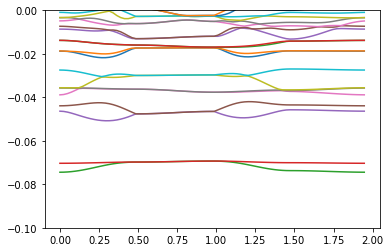

In [192]:
import matplotlib.pyplot as plt
for eig in eigvals:
    plt.plot(kpath,eig)
plt.ylim(-0.1,0,)

In [193]:
EF

-0.1369579675958046

In [101]:

eigvals = [ f.remove_empty(eigval.text.replace("\n","").split(" ")) for eigval in band_structure.iter("eigenvalues") ]
eigvals = np.array(eigvals, dtype=float );
print(eigvals.shape)
#eigenvals = [f.remove_double(" ",eigval.text).split("\n") for eigval in band_structure.iter("eigenvalues") ]
#eigenvals = [f.remove_empty(eigenval) for eigval in band_structure.iter("eigenvalues") ]

#print( eigenvals  )
 #   #print( f.remove_double("\n",f.remove_double(" ",eigval.text) ) )

(80, 36)


In [102]:
kpts.shape

(160, 3)